In [ ]:
#!pip install yfinance

In [ ]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# # get stock info
# # print(msft.info)

# # get historical market data
hist = msft.history(period="500d")

In [ ]:
import yfinance as yf
bse_data = yf.download('^BSESN', start='2015-01-01', end='2020-06-30')

In [ ]:
import yfinance as yf
import csv
import numpy as np

In [ ]:
urls=['msft']

In [ ]:
for url in urls:
    tickerTag = yf.Ticker(url)
    tickerTag.actions.to_csv("tickertag{}.csv".format(url))

In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_prices = pd.read_csv('500112.csv.xls')

In [4]:
df_prices

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,1-July-2021,420.00,423.50,417.25,420.40,421.158842,1155524,18402,4.866592e+08,390709,33.81,6.25,0.40
1,30-June-2021,423.90,425.00,418.40,419.25,422.252358,1150665,11283,4.858710e+08,126779,11.02,6.60,-4.65
2,29-June-2021,427.40,429.00,420.75,421.50,424.480474,2536574,14029,1.076726e+09,1881066,74.16,8.25,-5.90
3,28-June-2021,431.00,433.00,424.55,426.65,427.878209,1228981,15389,5.258542e+08,167853,13.66,8.45,-4.35
4,25-June-2021,420.05,430.95,418.85,428.75,425.906384,1349402,16733,5.747189e+08,382098,28.32,12.10,8.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,7-January-2020,324.00,327.00,315.55,318.25,320.270732,1798194,21754,5.759089e+08,344318,19.15,11.45,-5.75
371,6-January-2020,332.00,332.00,317.90,318.95,322.001646,1422311,20595,4.579865e+08,328475,23.09,14.10,-13.05
372,3-January-2020,338.00,338.00,332.10,333.75,335.043413,761014,9260,2.549727e+08,156994,20.63,5.90,-4.25
373,2-January-2020,334.85,339.85,333.40,339.30,336.944389,882070,8735,2.972085e+08,158612,17.98,6.45,4.45


<AxesSubplot:>

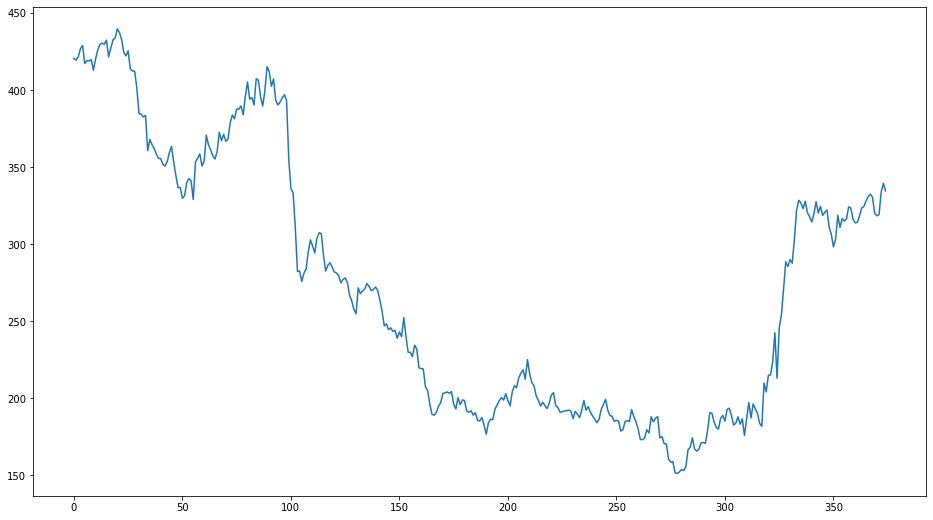

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot everything by leveraging the very powerful matplotlib package
df_prices['Close Price'].plot(figsize=(16, 9))

In [6]:
df_new=df_prices[['Date', 'Close Price']].copy()
df_new

,Date,Close Price
0,1-July-2021,420.40
1,30-June-2021,419.25
2,29-June-2021,421.50
3,28-June-2021,426.65
4,25-June-2021,428.75
...,...,...
370,7-January-2020,318.25
371,6-January-2020,318.95
372,3-January-2020,333.75
373,2-January-2020,339.30


In [48]:
df=df_new.set_index('Date')
df

,Close Price
Date,
2021-07-01,420.40
2021-06-30,419.25
2021-06-29,421.50
2021-06-28,426.65
2021-06-25,428.75
...,...
2020-01-07,318.25
2020-01-06,318.95
2020-01-03,333.75


In [11]:
from dateutil.parser import parse

In [40]:
import datetime

In [46]:
df_new['Date'] = pd.to_datetime(df_new['Date'], errors='coerce')
df_new["Date"] = df_new["Date"].dt.strftime("%Y-%m-%d")
    

In [47]:
df_new

,Date,Close Price
0,2021-07-01,420.40
1,2021-06-30,419.25
2,2021-06-29,421.50
3,2021-06-28,426.65
4,2021-06-25,428.75
...,...,...
370,2020-01-07,318.25
371,2020-01-06,318.95
372,2020-01-03,333.75
373,2020-01-02,339.30


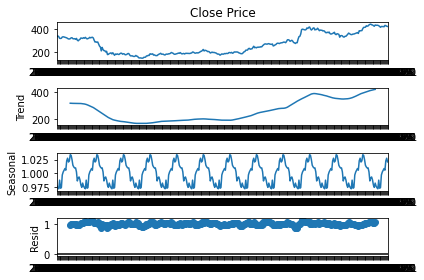

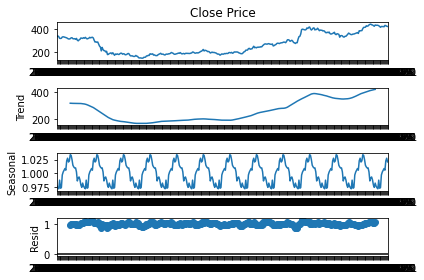

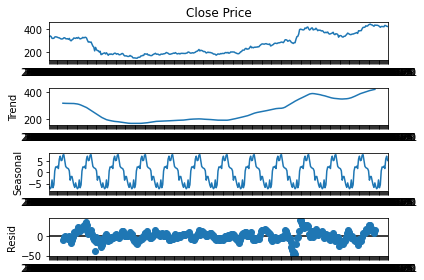

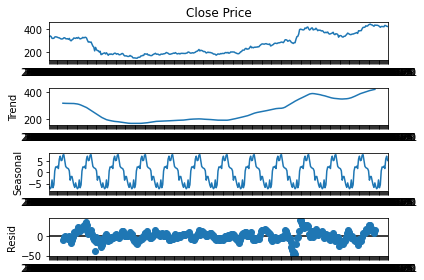

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
# df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
series = df['Close Price']
result = seasonal_decompose(series, model='additive',period=30)
result.plot()


array([[<AxesSubplot:title={'center':'Close Price'}>]], dtype=object)

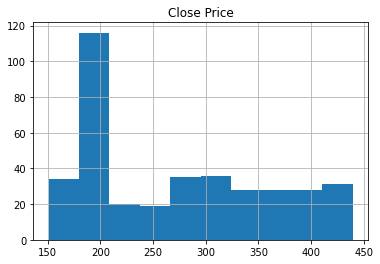

In [53]:
df.hist('Close Price')

<BarContainer object of 60 artists>

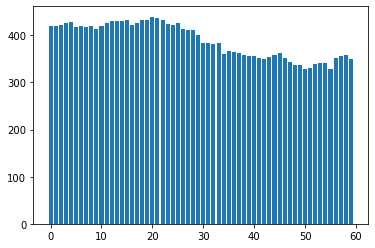

In [81]:
dff=df_new.head(60)
plt.bar(dff.index, dff["Close Price"])

In [54]:
df.describe()

,Close Price
count,375.00000
mean,271.78040
std,85.30124
min,150.85000
25%,191.62500
50%,263.05000
75%,340.42500
max,439.65000


In [55]:
 from statsmodels.tsa.stattools import adfuller

In [56]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
import numpy as np
logdf=np.log(df['Close Price'])

In [ ]:
logdf

In [ ]:
loghead=logdf.head(30)

In [ ]:
log=loghead.plot()

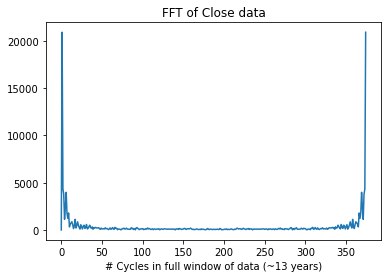

In [49]:
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt
fft = fft((df['Close Price'] - df['Close Price'].mean()).values)
plt.plot(np.abs(fft))
plt.title("FFT of Close data")
plt.xlabel('# Cycles in full window of data (~13 years)');

Text(0.5, 0, 'Frequency ($y^{-1}$)')

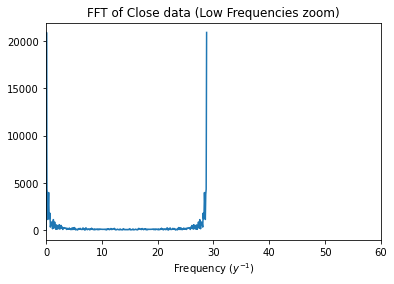

In [50]:
plt.plot(1./13 * np.arange(len(fft)), np.abs(fft))
plt.title("FFT of Close data (Low Frequencies zoom)")
plt.xlim([0,60])
plt.xlabel('Frequency ($y^{-1}$)')

In [57]:
adfuller_test(df['Close Price'])


ADF Test Statistic : -0.6334328764005213
p-value : 0.8632472250666907
#Lags Used : 7
Number of Observations Used : 367
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [82]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Close Price'].dropna(), trace=True,
suppress_warnings=True, m=30)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[30]             : AIC=inf, Time=2.57 sec
 ARIMA(0,2,0)(0,0,0)[30]             : AIC=2803.800, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[30]             : AIC=2696.635, Time=0.14 sec
 ARIMA(0,2,1)(0,0,1)[30]             : AIC=2561.219, Time=0.30 sec
 ARIMA(0,2,1)(0,0,0)[30]             : AIC=2561.829, Time=0.03 sec
 ARIMA(0,2,1)(1,0,1)[30]             : AIC=2562.620, Time=0.65 sec
 ARIMA(0,2,1)(0,0,2)[30]             : AIC=2562.038, Time=1.80 sec
 ARIMA(0,2,1)(1,0,0)[30]             : AIC=2560.984, Time=0.52 sec
 ARIMA(0,2,1)(2,0,0)[30]             : AIC=2562.247, Time=1.11 sec
 ARIMA(0,2,1)(2,0,1)[30]             : AIC=inf, Time=5.28 sec
 ARIMA(0,2,0)(1,0,0)[30]             : AIC=2803.521, Time=0.84 sec
 ARIMA(1,2,1)(1,0,0)[30]             : AIC=2562.957, Time=0.61 sec
 ARIMA(0,2,2)(1,0,0)[30]             : AIC=2562.958, Time=0.37 sec
 ARIMA(1,2,2)(1,0,0)[30]             : AIC=2562.314, Time=1.02 sec
 ARIMA(0,2,1)(1,0,0)[30] inte

In [88]:
import statsmodels.api as sm

In [89]:
# specify training data

data = df['Close Price']

# define model

model = sm.tsa.statespace.SARIMAX(data, order=(0,2,1), seasonal_order=(0,2,1,30))

# fit model

model_fit = model.fit()

# one step forecast

yhat = model_fit.forecast(10)

C:\Users\vskar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vskar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vskar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [90]:
train=df.iloc[:-10]
test=df.iloc[-10:]
print(train.shape,test.shape)

(365, 1) (10, 1)


In [60]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Close Price'].dropna(),order=(0,2,1))
model=model.fit(disp=0, type='levels')
model.summary()

C:\Users\vskar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vskar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.Close Price   No. Observations:                  363
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1245.795
Method:                       css-mle   S.D. of innovations              7.425
Date:                Tue, 13 Jul 2021   AIC                           2497.590
Time:                        13:24:59   BIC                           2509.273
Sample:                             2   HQIC                          2502.234
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0099      0.004      2.686      0.007       0.003       0.017
ma.L1.D2.Close Price    -1.0000      0.010    -99.595      0.000      -1.020      -0.980
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [91]:
r2_score(test['Close Price'], yhat)

-75.8737625432929

In [93]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(test['Close Price'], f))
rms

37.777815228785954

In [ ]:
df['Close First Difference'] = df['Close'] - df['Close'].shift(1)

In [87]:
f,a,b=model.forecast(10)

AttributeError: 'SARIMAX' object has no attribute 'forecast'

In [62]:
model.forecast(10)

(array([422.27286892, 424.35568653, 426.44845283, 428.55116782,
        430.6638315 , 432.78644386, 434.91900492, 437.06151467,
        439.2139731 , 441.37638023]),
 array([ 7.42524556, 10.50093855, 12.8610387 , 14.85072691, 16.60370531,
        18.18854414, 19.64597701, 21.00254401, 22.27667984, 23.4818066 ]),
 array([[407.71965505, 436.82608279],
        [403.77422517, 444.93714789],
        [401.24128018, 451.65562548],
        [399.44427794, 457.6580577 ],
        [398.12116707, 463.20649592],
        [397.13755243, 468.4353353 ],
        [396.41359754, 473.4244123 ],
        [395.89728482, 478.22574451],
        [395.55248293, 482.87546328],
        [395.35288499, 487.39987546]]))

In [63]:
f

array([422.27286892, 424.35568653, 426.44845283, 428.55116782,
       430.6638315 , 432.78644386, 434.91900492, 437.06151467,
       439.2139731 , 441.37638023])

In [ ]:
plt.plot(range(test.shape[0]), test['Close Price'])                                                                                           

In [ ]:
f.shape

In [ ]:
test['Close Price'].shape

In [ ]:
test.shape

In [ ]:
plt.plot(range(test.shape[0]), test['Close Price'])     
plt.plot(range(test.shape[0]), f) 
plt.legend()

In [ ]:
pred=model.predict(start=100, end=199)
fc, se, conf=model.forecast(10,alpha=0.05)
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
fc_series.plot(legend=True)
pred.plot(legend=True)
df['Close Price'].plot(legend=True)

In [ ]:
pred=model.predict()
# print(pred)
pred.plot()
df['Close Price'].plot()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df['Close Price'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [ ]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
from pmdarima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

In [ ]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model = ARIMA(train_data, order=(1, 0, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

In [ ]:
# Forecast
fc, se, conf = fitted.forecast(38, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
import math

In [ ]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

In [65]:
from sklearn.metrics import r2_score

r2_score(test['Close'],f)

In [66]:
r2_score(test['Close Price'], f)

-7.697092620721222

In [ ]:
df['Close First Difference'] = df['Close Price'] - df['Close Price'].shift(1)

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close First Difference'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Close Price'].iloc[1:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Close Price'].iloc[1:],lags=10,ax=ax2)